In [25]:
import pandas as pd

books_df = pd.read_csv('Book&rating.csv')

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [27]:
subsample_books = books_df.sample(n=20,random_state=42)

Make Rating Category

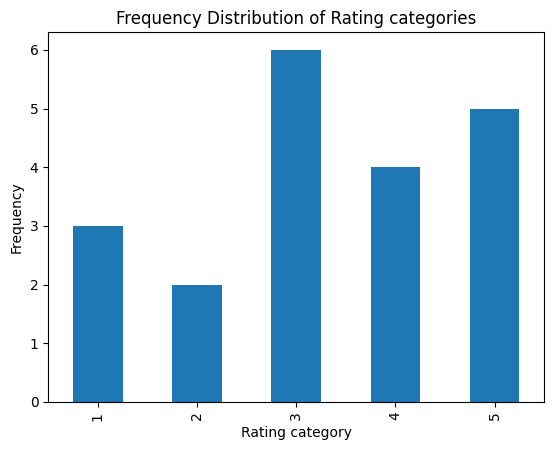

        User-ID        ISBN  Book-Rating  \
107209    41841  0140287442            6   
127762    22022  0812694333            4   
45624     37644  006092988X           10   
165014    76151  0671737791           10   
145873   108405  0399149392            8   

                                     Book-Title    Book-Author  \
107209                           dreamed africa  kuki gallmann   
127762              simpson philosophy oh homer  william irwin   
45624                       tree grows brooklyn    betty smith   
165014                                    bride  julie garwood   
145873  chesapeake blue quinn brother hardcover    nora robert   

        Year-Of-Publication                 Book-Publisher  \
107209                 2000                   penguin book   
127762                 2001  open court publishing company   
45624                  1998                      perennial   
165014                 1991                    pocket star   
145873                 2002 

In [28]:
subsample_books['Rating-Category'] = pd.cut(subsample_books['Book-Rating'], 
                                    bins=[0, 6, 7, 8, 9,10], 
                                    labels=[1, 2, 3, 4, 5], 
                                    right=True)
rating_counts = subsample_books['Rating-Category'].value_counts().sort_index()
rating_counts.plot(kind='bar')
# Set plot title and labels
plt.title('Frequency Distribution of Rating categories')
plt.xlabel('Rating category')
plt.ylabel('Frequency')
# Display the plot
plt.show()
# Display the updated DataFrame
print(subsample_books.head())

Regresson

In [33]:
x = subsample_books.drop(columns=['ISBN', 'Book-Rating', 'Rating-Category', 'Book-Title', 'Book-Author', 'Book-Publisher', 'Year-Of-Publication-Bin'])
y = subsample_books['Book-Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# print(x.dtypes)
# print('x=', y)
print(x)

linear_reg= LinearRegression()
linear_scores = cross_val_score(linear_reg, x, y, cv= 5, scoring= 'neg_mean_squared_error')
linear_r2_scores = cross_val_score(linear_reg, x ,y, cv=5, scoring = 'r2')
linear_rmse_scores= (-linear_scores)**0.5

print('Linear Regression Cross-Validation RMSE Scores:')
print(linear_rmse_scores)
print('Linear Regression Mean RMSE:', linear_rmse_scores.mean())
print('Linear Regression Cross-Validation R^2 Scores:')
print(linear_r2_scores)
print('Linear Regression Mean R^2:', linear_r2_scores.mean())

        User-ID  Year-Of-Publication  Book-Author-Encode  \
107209    41841                 2000                3574   
127762    22022                 2001                6357   
45624     37644                 1998                 647   
165014    76151                 1991                3310   
145873   108405                 2002                4684   
19297    135703                 2002                 489   
63644    223455                 2001                5762   
104058    47316                 1995                 313   
195571   213312                 1988                 821   
164657   100846                 1999                4736   
42429     26540                 1997                5155   
74770    223566                 1994                5762   
91188     28133                 1996                4239   
107559   168245                 1997                3245   
132882    59172                 1988                5670   
113407   266855                 1998    

In [30]:
# Initialize Decision Tree Regression model
dt_reg= DecisionTreeRegressor(random_state=42)

# Cross-validation for Decision Tree Regression
dt_scores = cross_val_score(dt_reg, x, y, cv=5,scoring='neg_mean_squared_error')
dt_r2_scores =cross_val_score(dt_reg, x, y, cv=5,scoring='r2')
dt_rmse_scores =(-dt_scores)**0.5
print('Decision Tree Regression Cross-Validation RMsE Scores:')
print(dt_rmse_scores)
print('Decision Tree Regression Mean RMSE:', dt_rmse_scores.mean())
print('Decision Tree Regression Cross-Validation R^2 Scores:')
print(dt_r2_scores)
print('Decision Tree Regression Mean R^2:', dt_r2_scores.mean())

Decision Tree Regression Cross-Validation RMsE Scores:
[3.39116499 3.082207   1.22474487 2.44948974 2.73861279]
Decision Tree Regression Mean RMSE: 2.577243878949544
Decision Tree Regression Cross-Validation R^2 Scores:
[-0.7037037  -3.34285714 -1.18181818 -4.05263158 -9.90909091]
Decision Tree Regression Mean R^2: -3.8380203032834608
